# Data Science and Business Analytics (GRIP May'21)

## Task 1 : Prediction using Supervised ML

### Author : Priyanshi Nagrath

#### Problem statement

#### What will be predicted score if a student studies for 9.25 hrs/ day?


#### (1) Importing all the required libraries :

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import requests
import io 

#### (2) Importing Dataset and Vizualizing Data

In [7]:
data= pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
print("Data has been succesfully imported")
data 

Data has been succesfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### (3) Plotting the data 

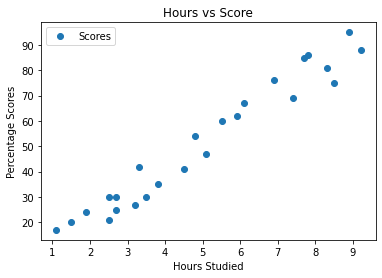

In [9]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

From the graph, we can clearly see that there exists a positive linear relation between the number of hours studied and percentage of marks obtained.

#### (4) Preparing the data 

The next step involves dividing the data into "attributes" (inputs) and "labels" (output) and splitting the data into training and test sets.

In [10]:
# Using scikit-learn inbuilt train_test_split method.
train,test=train_test_split(data, test_size = 0.25,random_state=123)

train_x=train.drop("Scores",axis=1)
train_y=train["Scores"]

test_x=test.drop("Scores",axis=1)
test_y=test["Scores"]

#### (5) Training the Algorithm

After splitting our data into training and testing sets, we now train the algorithm.

In [11]:
lr=LinearRegression()
lr.fit(train_x, train_y)

print('Training Complete')

Training Complete


In [12]:
lr.coef_

array([9.61718609])

In [13]:
lr.intercept_

2.448617866650636

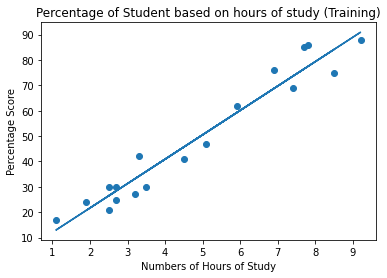

In [14]:
# Plotting the regression line(y = a + bX)
line = lr.coef_*train_x+lr.intercept_

# Plotting for the training data
plt.scatter(train_x, train_y)
plt.plot(train_x,line)
plt.title("Percentage of Student based on hours of study (Training)")
plt.xlabel("Numbers of Hours of Study")
plt.ylabel("Percentage Score")
plt.show()


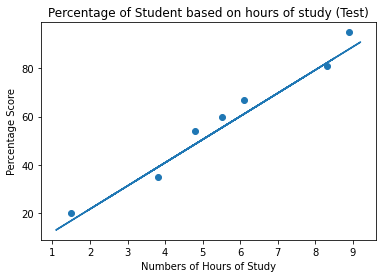

In [15]:
# Plotting for the test data
plt.scatter(test_x, test_y)
plt.plot(train_x,line)
plt.title("Percentage of Student based on hours of study (Test)")
plt.xlabel("Numbers of Hours of Study")
plt.ylabel("Percentage Score")
plt.show()

#### (6) Making Predictions

In [16]:
print(test_x)               # Testing data in-Hours
y_pred = lr.predict(test_x) # Predicting the Scores

    Hours
5     1.5
21    4.8
22    3.8
18    6.1
15    8.9
8     8.3
7     5.5


In [17]:
# Comparing Actual vs Predicted
dataf = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})

dataf

,Actual,Predicted
5,20,16.874397
21,54,48.611111
22,35,38.993925
18,67,61.113453
15,95,88.041574
8,81,82.271262
7,60,55.343141


In [18]:
# Using particular values
hours = [9.25]
own_pred=lr.predict([hours])
print("No of hour = {}".format([hours]))
print("Predicted Score = {}".format(own_pred[0])) 

No of hour = [[9.25]]
Predicted Score = 91.407589223163


#### (7) Evaluating the Model

The final step is to evaluate the performance of the algorithm so as to compare how well different algorithms perform on a particular dataset. For simplicity, we use Mean square error and R2 value.

In [19]:
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:',
     mean_squared_error(test_y, y_pred))

Mean Squared Error: 23.019217337139764


In [20]:
from sklearn.metrics import r2_score
print(r2_score(test_y, y_pred))

0.9593798023076978
